<a href="https://colab.research.google.com/github/Mfr3ak/PyTorch-Practice/blob/PyTorch_Practice_Solutions/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Wed Oct 25 19:19:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

2.1.0+cu118
cuda


## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
from torchvision.datasets.mnist import MNIST
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = MNIST(root="data",
                   download=True,
                   train = True,
                   transform=ToTensor(),
                   target_transform= None)

test_data = MNIST (root = "data",
                   download = True,
                   train = False,
                   transform = ToTensor(),
                   target_transform = None)

100%|██████████| 9912422/9912422 [00:00<00:00, 111481563.27it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 26919043.07it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 20952611.68it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20572925.24it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

tensor(27019)


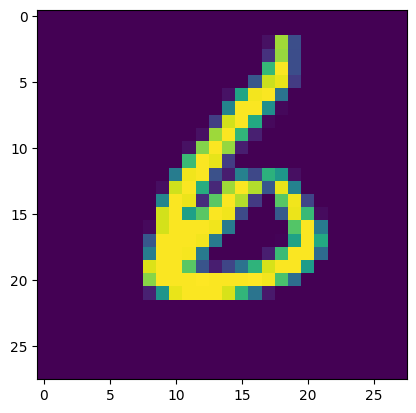

In [4]:
idx = torch.randint(0,len(train_data),(1,)).squeeze()
print(idx)
img,label = train_data[idx]
import matplotlib.pyplot as plt
plt.imshow(img.squeeze())

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [5]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [6]:
from torch import nn
class MNISTCNNV0(nn.Module):
    def __init__(self, input_states, hidden_states, output_states):
        super().__init__()
        self.Conv_Layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_states,
                      out_channels=hidden_states,
                      kernel_size = 3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_states,
                      out_channels = hidden_states,
                      kernel_size = 3,
                      padding = 1,
                      stride = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         padding = 0))
        self.Conv_Layer_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_states,
                      out_channels=hidden_states,
                      kernel_size = 3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_states,
                      out_channels = hidden_states,
                      kernel_size = 3,
                      padding = 1,
                      stride = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         padding = 0)
        )
        self.Linear_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_states*7*7,
                      out_features = output_states)
        )

    def forward(self,X):
        x = self.Conv_Layer_1(X)
        x = self.Conv_Layer_2(x)
        x = self.Linear_layer(x)
        return x

model_2 = MNISTCNNV0(1,10,10).to(device)
print(model_2)

MNISTCNNV0(
  (Conv_Layer_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Conv_Layer_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Linear_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)


## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [7]:
print(model_2)

MNISTCNNV0(
  (Conv_Layer_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Conv_Layer_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Linear_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)


In [8]:
temp,labels = next(iter(train_dataloader))

In [9]:
img = temp[0].unsqueeze(dim=0).to(device)

In [10]:
model_2(img)

tensor([[-0.0438, -0.0591,  0.0086, -0.1332,  0.0145, -0.0675, -0.0227,  0.0023,
          0.0250,  0.0040]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [11]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.01)

In [12]:
EPOCHS = 5
torch.manual_seed(42)
from tqdm.auto import tqdm

for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch : {epoch}--------------")
    train_loss = 0
    for batch_number, (X, y) in enumerate(train_dataloader):
        X = X.to(device)
        y = y.to(device)

        # training pass
        y_logits = model_2(X)
        y_probs = torch.softmax(y_logits, dim = 0)
        y_preds = torch.argmax(y_probs, dim = 1)

        train_loss_temp = loss_fn(y_logits,y)
        optimizer.zero_grad()
        train_loss_temp.backward()
        optimizer.step()
        train_loss += train_loss_temp
    print(f"Train_loss:{train_loss/len(train_dataloader)}")

    # Testing step
    test_loss = 0
    model_2.eval()
    with torch.inference_mode():
        for batch_number, (X_test,y_test) in enumerate(test_dataloader):
            X_test = X_test.to(device)
            y_test = y_test.to(device)
            y_logits_test = model_2(X_test)
            y_prob_test = torch.softmax(y_logits_test, dim = 0)
            y_preds_test= torch.argmax(y_prob_test, dim = 1)

            test_loss += loss_fn(y_logits_test, y_test)
        print(f"Test_loss:{test_loss/len(test_dataloader)}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch : 0--------------
Train_loss:1.1228055953979492
Test_loss:0.2187422662973404
Epoch : 1--------------
Train_loss:0.17085714638233185
Test_loss:0.10378216207027435
Epoch : 2--------------
Train_loss:0.10761585086584091
Test_loss:0.0815470814704895
Epoch : 3--------------
Train_loss:0.08773671090602875
Test_loss:0.07813568413257599
Epoch : 4--------------
Train_loss:0.0753052607178688
Test_loss:0.057839132845401764


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?